# IGN Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ign = pd.read_csv('ign.csv')
ign.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [3]:
ign.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [6]:
ign.drop(['Unnamed: 0','score_phrase','title','url','editors_choice','release_day'],axis = 1,inplace = True)
ign.columns

Index(['platform', 'score', 'genre', 'release_year', 'release_month'], dtype='object')

In [7]:
ign.head(3)

,platform,score,genre,release_year,release_month
0,PlayStation Vita,9.0,Platformer,2012,9
1,PlayStation Vita,9.0,Platformer,2012,9
2,iPad,8.5,Puzzle,2012,9


In [14]:
## Now we would like to analyse the score of games by the remaining columns
platform_stats = ign.groupby('platform').score.agg(['count','mean'])
platform_stats = platform_stats.reset_index()
platform_stats.shape

(59, 3)

In [19]:
## Throwing down basic plots - platform vs No of games, and platform vs mean score
## However there are 59 different types of platforms, so we must sort and display only the top 10 for each plot
pls_count = platform_stats.sort_values(['count'],ascending = False).head(10)
pls_score = platform_stats.sort_values(['mean'],ascending = False).head(10)

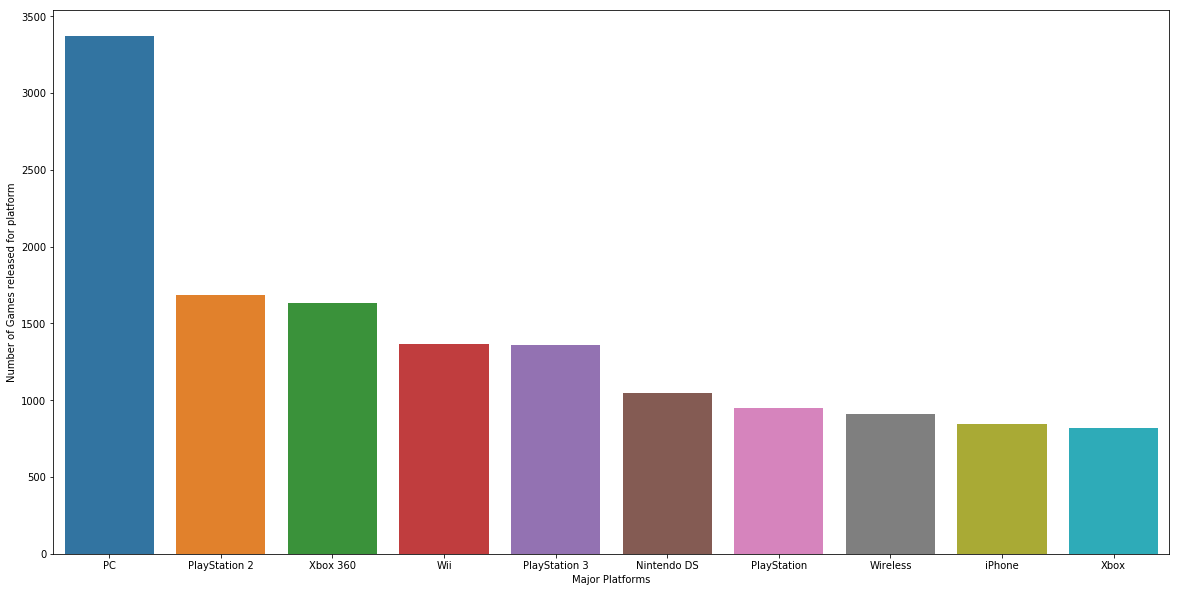

In [20]:
## Time to plot Platform vs Number of Games released

plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x = 'platform', y = 'count',data = pls_count)

plt.xlabel("Major Platforms")
plt.ylabel("Number of Games released for platform")

plt.show()

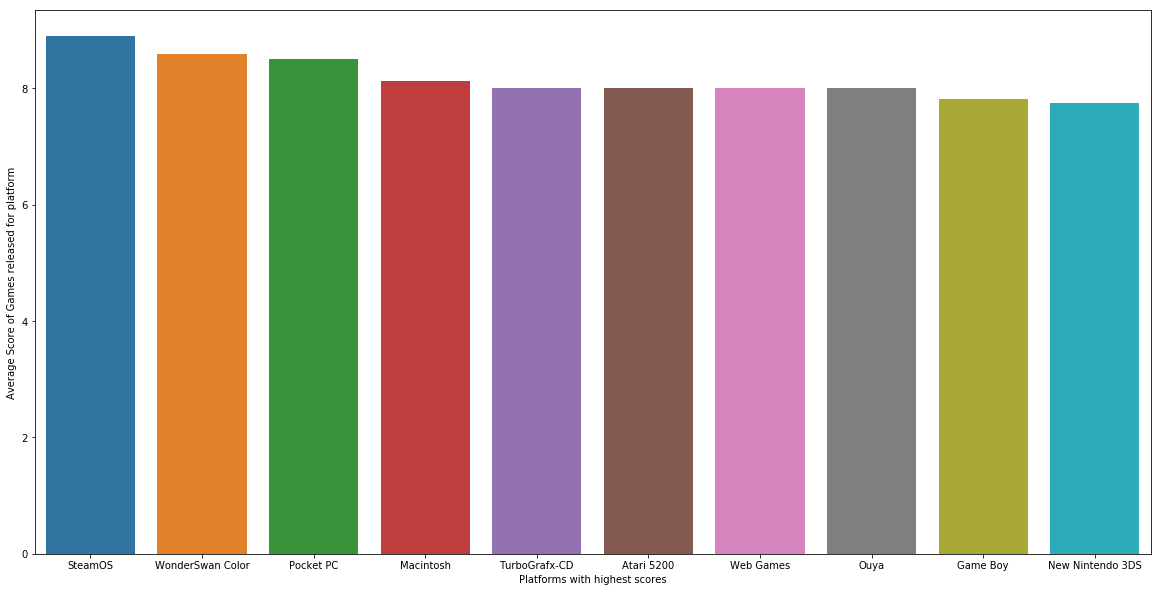

In [22]:
## Time to plot Platform vs Average Score of Game

plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x = 'platform', y = 'mean',data = pls_score)

plt.xlabel("Platforms with highest scores")
plt.ylabel("Average Score of Games released for platform")

plt.show()

In [23]:
## Performing same analysis for genre
genre_stats = ign.groupby('genre').score.agg(['count','mean'])
genre_stats = genre_stats.reset_index()
genre_stats.shape

(112, 3)

In [24]:
gs_count = genre_stats.sort_values(['count'],ascending = False).head(10)
gs_score = genre_stats.sort_values(['mean'],ascending = False).head(10)

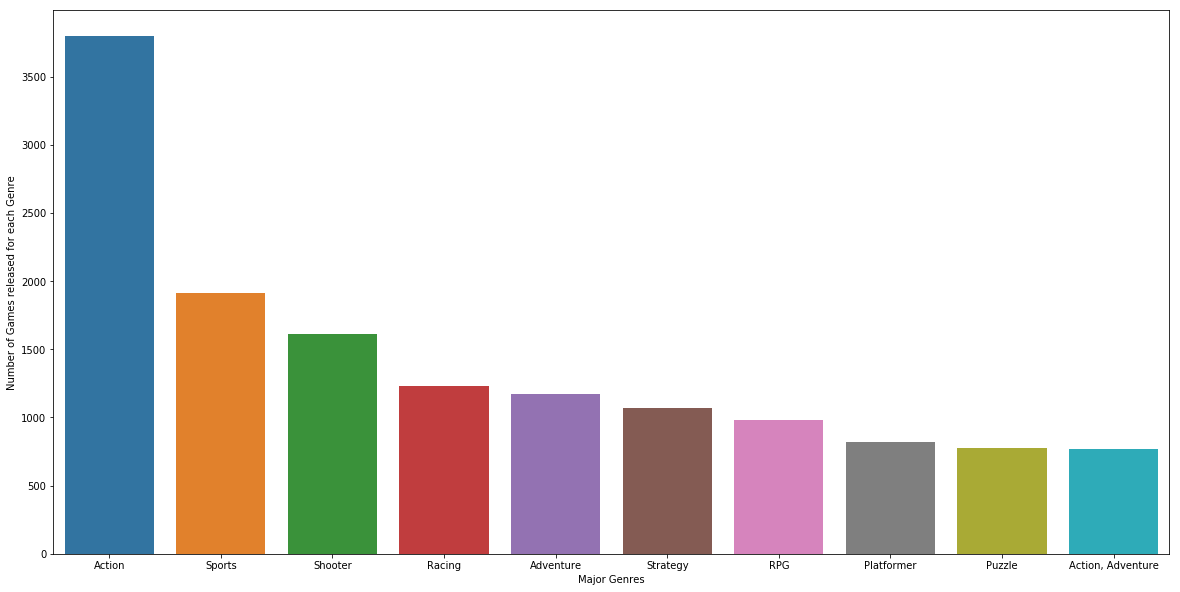

In [25]:
## Time to plot Genre vs Number of Games released

plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x = 'genre', y = 'count',data = gs_count)

plt.xlabel("Major Genres")
plt.ylabel("Number of Games released for each Genre")

plt.show()

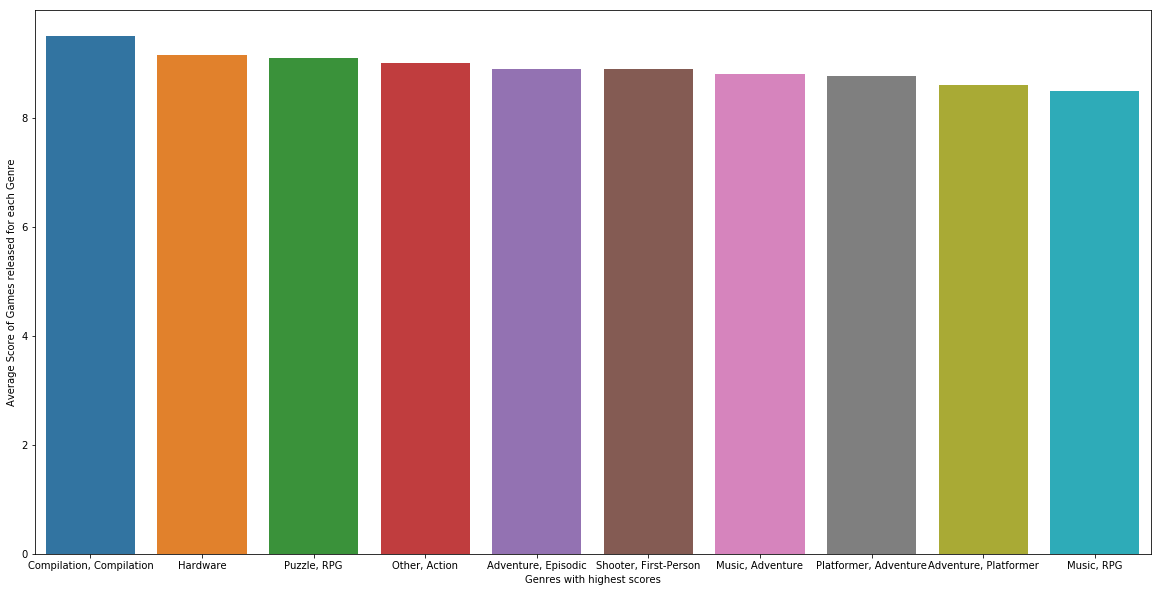

In [26]:
## Time to plot Genre vs Average Score of Game

plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x = 'genre', y = 'mean',data = gs_score)

plt.xlabel("Genres with highest scores")
plt.ylabel("Average Score of Games released for each Genre")

plt.show()